# Client Project Skills Assessment

FinanceZ company provides personal installment loans to borrowers through the primary verticals that it operates in: Home Improvement, Vehicle, and Retail. The Risk and Operations department senior management need to monitor the loan portfolio to ensure that delinquency and losses are at acceptable levels.


## Data Analysis

In [136]:
import pandas as pd
import csv
import re
import numpy as np
import random

from datetime import datetime

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from collections import Counter # Keep track of our term counts
import json # For parsing json

from sqlalchemy import create_engine, text

import configparser

In [137]:
df1 = pd.read_csv('Test_Data_C_2014_06_30.csv')

In [3]:
df1.head(50)

,Unnamed: 0,ID,Dlq_stat,amounts,obs_date,Dlq_days,Vertical1,Province1
0,1,F1,Current,389.63,2014-06-30 12:00:00,NaN,Home Improvement,ON
1,2,F2,Current,2446.13,2014-06-30 12:00:00,NaN,Vehicle,AB
2,3,F3,Current,2874.37,2014-06-30 12:00:00,NaN,Home Improvement,ON
3,4,F4,Current,299.63,2014-06-30 12:00:00,NaN,Home Improvement,ON
4,5,F5,Current,745.46,2014-06-30 12:00:00,NaN,Home Improvement,Other Provinces
5,6,F6,Current,292.90,2014-06-30 12:00:00,NaN,Home Improvement,ON
6,7,F7,Current,1913.26,2014-06-30 12:00:00,NaN,Home Improvement,ON
7,8,F8,Current,2749.59,2014-06-30 12:00:00,NaN,Vehicle,AB
8,9,F9,Current,1638.36,2014-06-30 12:00:00,NaN,Home Improvement,ON
9,10,F10,Current,10432.11,2014-06-30 12:00:00,NaN,Vehicle,AB


In [138]:
df2 = pd.read_csv('Test_Data_C_2014_07_30.csv')

In [15]:
#df2

In [140]:
df3 = pd.read_csv('Test_Data_C_2014_08_30.csv')

In [16]:
#df3

In [12]:
df1.shape

(13386, 8)

In [13]:
df2.shape

(13180, 8)

In [14]:
df3.shape

(13829, 8)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13386 non-null  int64  
 1   ID          13386 non-null  object 
 2   Dlq_stat    13386 non-null  object 
 3   amounts     13386 non-null  float64
 4   obs_date    13386 non-null  object 
 5   Dlq_days    105 non-null    float64
 6   Vertical1   13386 non-null  object 
 7   Province1   13386 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 836.8+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13180 entries, 0 to 13179
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13180 non-null  int64  
 1   ID          13180 non-null  object 
 2   Dlq_stat    13180 non-null  object 
 3   amounts     13180 non-null  float64
 4   obs_date    13180 non-null  object 
 5   Dlq_days    94 non-null     float64
 6   Vertical1   13180 non-null  object 
 7   Province1   13180 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 823.9+ KB


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13829 entries, 0 to 13828
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13829 non-null  int64  
 1   ID          13829 non-null  object 
 2   Dlq_stat    13829 non-null  object 
 3   amounts     13829 non-null  float64
 4   obs_date    13829 non-null  object 
 5   Dlq_days    150 non-null    float64
 6   Vertical1   13829 non-null  object 
 7   Province1   13829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 864.4+ KB


In [59]:
#numeric features
df1.describe()

,Unnamed: 0,amounts,Dlq_days
count,13386.00,13386.00,105.00
mean,6749.08,1954.16,26.10
std,4394.21,1792.65,25.89
min,1.00,0.00,0.00
25%,3347.25,857.59,4.00
50%,6693.50,1460.78,15.00
75%,10039.75,2356.99,46.00
max,121000.00,16611.38,79.00


In [60]:
#numeric features
df2.describe()

,Unnamed: 0,amounts,Dlq_days
count,13180.00,13180.00,94.00
mean,6640.84,1941.30,31.98
std,4323.45,1790.08,28.18
min,1.00,0.00,0.00
25%,3295.75,846.34,7.00
50%,6590.50,1445.85,18.00
75%,9885.25,2341.04,58.75
max,121000.00,16557.14,110.00


In [130]:
#numeric features
df3.describe()

,Unnamed: 0,amounts,Dlq_days
count,13829.00,13829.00,150.00
mean,6981.74,1933.38,24.57
std,4539.33,1770.63,21.86
min,1.00,0.00,0.00
25%,3458.00,850.54,7.00
50%,6915.00,1450.31,19.00
75%,10372.00,2328.59,35.00
max,121000.00,16637.15,90.00


In [61]:
# categorical features
df1.describe(include='O')

,ID,Dlq_stat,obs_date,Vertical1,Province1
count,13386,13386,13386,13386,13386
unique,13386,3,1,2,4
top,F1,Current,2014-06-30 12:00:00,Vehicle,ON
freq,1,13272,13386,7099,4604


In [132]:
# categorical features
df2.describe(include='O')

,ID,Dlq_stat,obs_date,Vertical1,Province1
count,13180,13180,13180,13180,13180
unique,13180,3,1,2,4
top,G1,Current,2014-07-30 12:00:00,Vehicle,ON
freq,1,13072,13180,6979,4516


In [133]:
# categorical features
df3.describe(include='O')

,ID,Dlq_stat,obs_date,Vertical1,Province1
count,13829,13829,13829,13829,13829
unique,13829,3,1,2,4
top,H1,Current,2014-08-30 12:00:00,Home Improvement,ON
freq,1,13659,13829,6915,4811


In [62]:
# as always let's briefly look at the label
# it's imbalanced, so we'll need to address that
df1['Dlq_stat'].value_counts()

Dlq_stat
Current       13272
Delinquent      105
WriteOff          9
Name: count, dtype: int64

In [15]:
df1['Dlq_stat'].value_counts(normalize=True)

Dlq_stat
Current      0.99
Delinquent   0.01
WriteOff     0.00
Name: proportion, dtype: float64

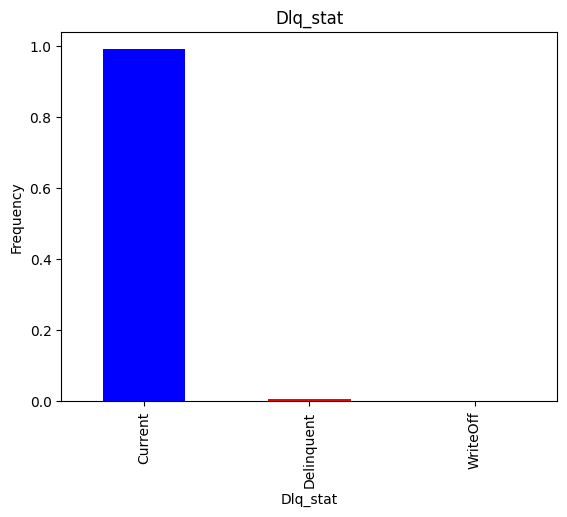

In [63]:
df1['Dlq_stat'].value_counts(normalize=True).plot(kind='bar',title='Dlq_stat', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Dlq_stat')
plt.ylabel('Frequency');

In [17]:
df2['Dlq_stat'].value_counts()

Dlq_stat
Current       13072
Delinquent       94
WriteOff         14
Name: count, dtype: int64

In [18]:
df2['Dlq_stat'].value_counts(normalize=True)

Dlq_stat
Current      0.99
Delinquent   0.01
WriteOff     0.00
Name: proportion, dtype: float64

In [139]:
df3['Dlq_stat'].value_counts()

Dlq_stat
Current       13659
Delinquent      150
WriteOff         20
Name: count, dtype: int64

In [19]:
df3['Dlq_stat'].value_counts(normalize=True)


Dlq_stat
Current      0.99
Delinquent   0.01
WriteOff     0.00
Name: proportion, dtype: float64

In [20]:
df1['obs_date'].value_counts()

obs_date
2014-06-30 12:00:00    13386
Name: count, dtype: int64

In [141]:
# convert fromat from object to datetime64[ns]
df1["obs_date"]=pd.to_datetime(df1["obs_date"]) 

In [22]:
df2['obs_date'].value_counts()

obs_date
2014-07-30 12:00:00    13180
Name: count, dtype: int64

In [142]:
# convert fromat from object to datetime64[ns]
df2["obs_date"]=pd.to_datetime(df2["obs_date"]) 

In [24]:
df3['obs_date'].value_counts()

obs_date
2014-08-30 12:00:00    13829
Name: count, dtype: int64

In [143]:
# convert fromat from object to datetime64[ns]
df3["obs_date"]=pd.to_datetime(df3["obs_date"]) 

In [26]:
df1['Vertical1'].value_counts()

Vertical1
Vehicle             7099
Home Improvement    6287
Name: count, dtype: int64

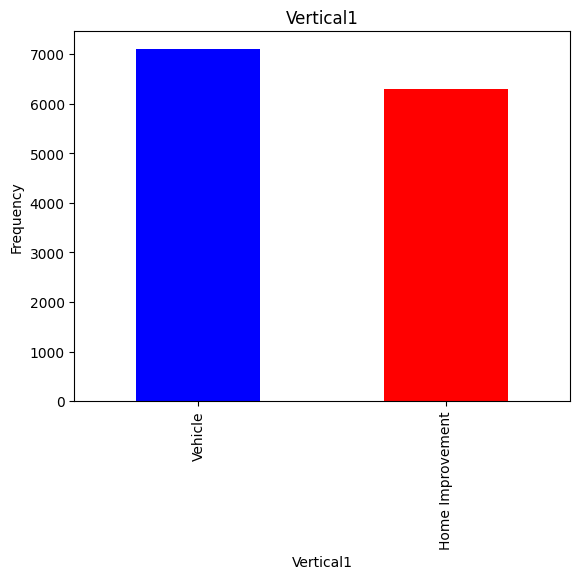

In [148]:
df1['Vertical1'].value_counts().plot(kind='bar',title='Vertical1', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Vertical1')
plt.ylabel('Frequency');

In [27]:
df2['Vertical1'].value_counts()

Vertical1
Vehicle             6979
Home Improvement    6201
Name: count, dtype: int64

In [28]:
df3['Vertical1'].value_counts()

Vertical1
Home Improvement    6915
Vehicle             6914
Name: count, dtype: int64

In [151]:
df1['Province1'].value_counts()

Province1
ON                 4604
Other Provinces    3482
AB                 3112
BC                 2188
Name: count, dtype: int64

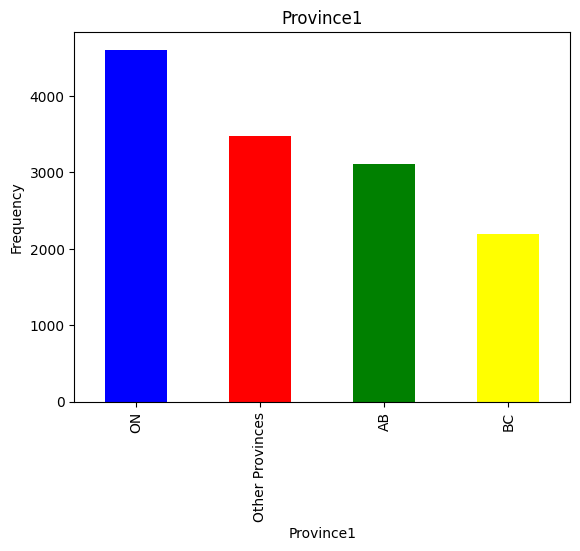

In [29]:
df1['Province1'].value_counts().plot(kind='bar',title='Province1', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Province1')
plt.ylabel('Frequency');

In [153]:
df2['Province1'].value_counts()

Province1
ON                 4516
Other Provinces    3446
AB                 3063
BC                 2155
Name: count, dtype: int64

In [154]:
df3['Province1'].value_counts()

Province1
ON                 4811
Other Provinces    3581
AB                 3233
BC                 2204
Name: count, dtype: int64

In [30]:
df1.isnull().sum()

Unnamed: 0        0
ID                0
Dlq_stat          0
amounts           0
obs_date          0
Dlq_days      13281
Vertical1         0
Province1         0
dtype: int64

In [31]:
df2.isnull().sum()

Unnamed: 0        0
ID                0
Dlq_stat          0
amounts           0
obs_date          0
Dlq_days      13086
Vertical1         0
Province1         0
dtype: int64

In [32]:
df3.isnull().sum()

Unnamed: 0        0
ID                0
Dlq_stat          0
amounts           0
obs_date          0
Dlq_days      13679
Vertical1         0
Province1         0
dtype: int64

In [144]:
# we'll use regular expression against the entire dataframe to capture any other empty value
df1.replace(r'^\s*$',np.nan, regex=True).isnull().sum()

Unnamed: 0        0
ID                0
Dlq_stat          0
amounts           0
obs_date          0
Dlq_days      13281
Vertical1         0
Province1         0
dtype: int64

In [65]:
df1['Dlq_days']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
13381   15.00
13382   41.00
13383     NaN
13384   55.00
13385   15.00
Name: Dlq_days, Length: 13386, dtype: float64

In [145]:
df1['Dlq_days'] = df1['Dlq_days'].fillna(0)

In [146]:
df2['Dlq_days'] = df2['Dlq_days'].fillna(0)

In [147]:
df3['Dlq_days'] = df3['Dlq_days'].fillna(0)

In [38]:
duplicateRows = df1[df1.duplicated()]

In [39]:
df1.duplicated().sum()

0

In [40]:
duplicateRows = df2[df2.duplicated()]

In [41]:
df2.duplicated().sum()

0

In [42]:
duplicateRows = df3[df3.duplicated()]

In [43]:
df3.duplicated().sum()

0

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  13386 non-null  int64         
 1   ID          13386 non-null  object        
 2   Dlq_stat    13386 non-null  object        
 3   amounts     13386 non-null  float64       
 4   obs_date    13386 non-null  datetime64[ns]
 5   Dlq_days    13386 non-null  float64       
 6   Vertical1   13386 non-null  object        
 7   Province1   13386 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 836.8+ KB


In [70]:
# drop some columns
df1_drop = df1.drop(columns= ['Unnamed: 0', 'ID'])

In [71]:
df1_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dlq_stat   13386 non-null  object 
 1   amounts    13386 non-null  float64
 2   obs_date   13386 non-null  object 
 3   Dlq_days   13386 non-null  float64
 4   Vertical1  13386 non-null  object 
 5   Province1  13386 non-null  object 
dtypes: float64(2), object(4)
memory usage: 627.6+ KB


### Engoding

In [149]:
df1_cov = pd.get_dummies(df1_drop, columns=['Dlq_stat'], dtype=int)

In [96]:
df1_cov.head(3)

,amounts,obs_date,Dlq_days,Vertical1,Province1,Dlq_stat_Current,Dlq_stat_Delinquent,Dlq_stat_WriteOff
0,389.63,2014-06-30 12:00:00,0.00,Home Improvement,ON,1,0,0
1,2446.13,2014-06-30 12:00:00,0.00,Vehicle,AB,1,0,0
2,2874.37,2014-06-30 12:00:00,0.00,Home Improvement,ON,1,0,0


### Group over Vertical1 and lq_stat

In [101]:
VerStat = df1_cov[['Vertical1', 'Dlq_stat_Current']]
VerStat_grp = VerStat.groupby(['Vertical1']).count()
VerStat_grp

,Dlq_stat_Current
Vertical1,
Home Improvement,6287
Vehicle,7099


<Axes: xlabel='Vertical1'>

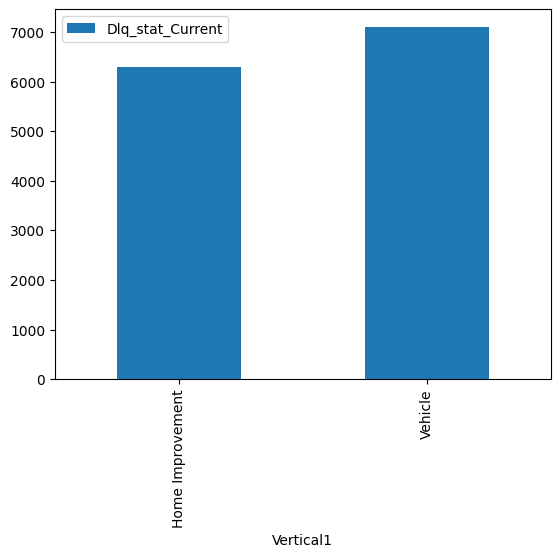

In [102]:
VerStat_grp.plot.bar()

In [103]:
VerStat = df1_cov[['Vertical1', 'Dlq_stat_Delinquent']]
VerStat_grp = VerStat.groupby(['Vertical1']).count()
VerStat_grp

,Dlq_stat_Delinquent
Vertical1,
Home Improvement,6287
Vehicle,7099


<Axes: xlabel='Vertical1'>

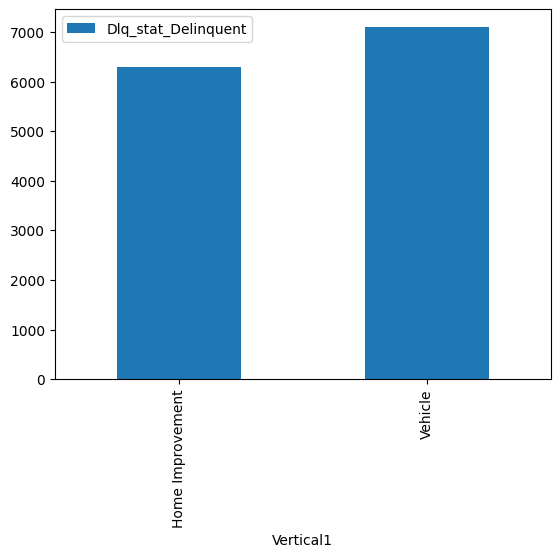

In [104]:
VerStat_grp.plot.bar()

In [105]:
VerStat = df1_cov[['Vertical1', 'Dlq_stat_WriteOff']]
VerStat_grp = VerStat.groupby(['Vertical1']).count()
VerStat_grp

,Dlq_stat_WriteOff
Vertical1,
Home Improvement,6287
Vehicle,7099


<Axes: xlabel='Vertical1'>

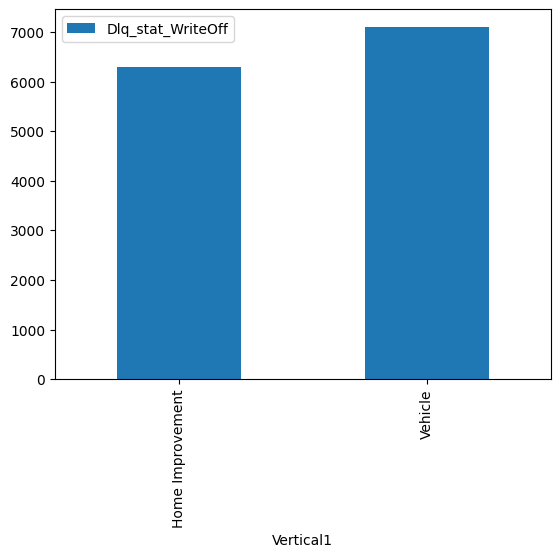

In [106]:
VerStat_grp.plot.bar()

### Group over Province1 and lq_stat

In [108]:
df1_pvstat = df1_drop.groupby('Province1')['Dlq_stat'].agg(['count'])
df1_pvstat.columns = ['Province1']
df1_pvstat

,Province1
Province1,
AB,3112
BC,2188
ON,4604
Other Provinces,3482


<Axes: xlabel='Province1'>

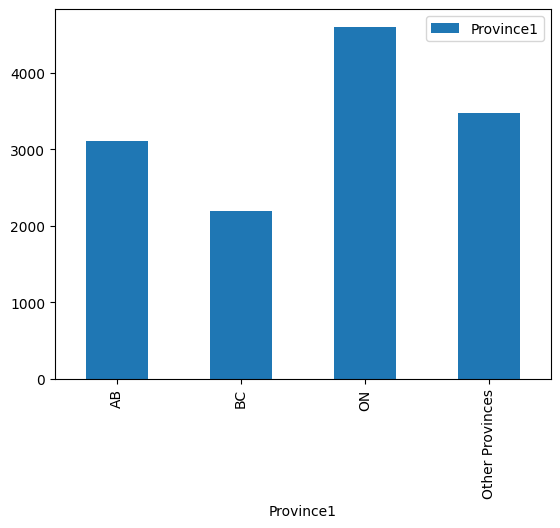

In [109]:
df1_pvstat.plot.bar()

### Group over amounts and lq_stat

In [113]:
df11_pvstat = df1_drop.groupby('Dlq_stat')['amounts'].agg(['sum'])
df11_pvstat.columns = ['Dlq_stat']
df11_pvstat

,Dlq_stat
Dlq_stat,
Current,25879663.69
Delinquent,266295.04
WriteOff,12422.30


<Axes: xlabel='Dlq_stat'>

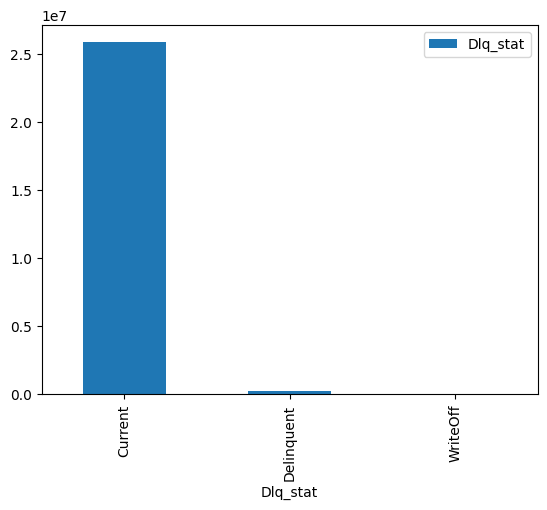

In [114]:
df11_pvstat.plot.bar()

## Task 2

Use Test_data_2014_06_30, Test_data_2014_07_30, and Test_data_2014_08_30

a) Management wants to know whether there are any key trends in performance between June and August. Use Google Slides or powerpoint to present your results (2-3 slides max).


In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13180 entries, 0 to 13179
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  13180 non-null  int64         
 1   ID          13180 non-null  object        
 2   Dlq_stat    13180 non-null  object        
 3   amounts     13180 non-null  float64       
 4   obs_date    13180 non-null  datetime64[ns]
 5   Dlq_days    13180 non-null  float64       
 6   Vertical1   13180 non-null  object        
 7   Province1   13180 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 823.9+ KB


### Group over Dlq_days and lq_stat

Text(0.5, 0, 'Dlq_days')

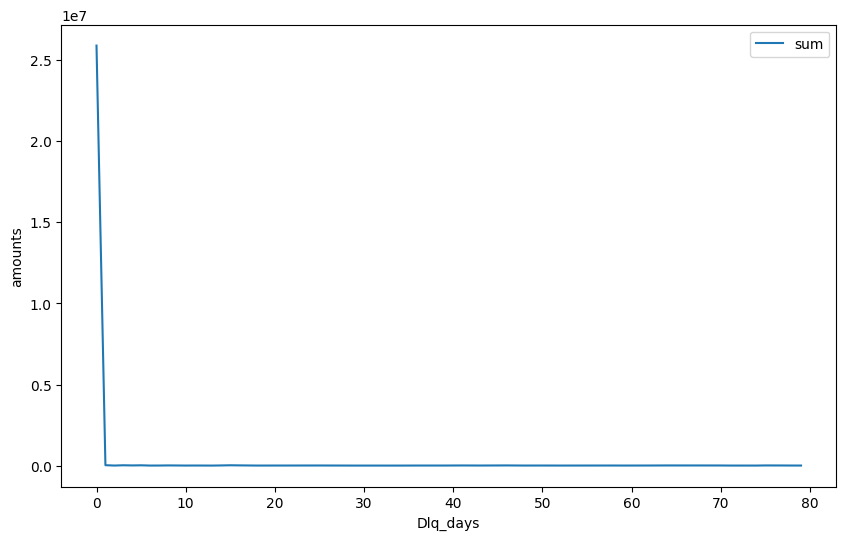

In [155]:
df1.groupby('Dlq_days')['amounts'].agg(['sum']).plot(figsize=(10,6))
plt.ylabel('amounts')
plt.xlabel('Dlq_days')

Text(0.5, 0, 'Dlq_days')

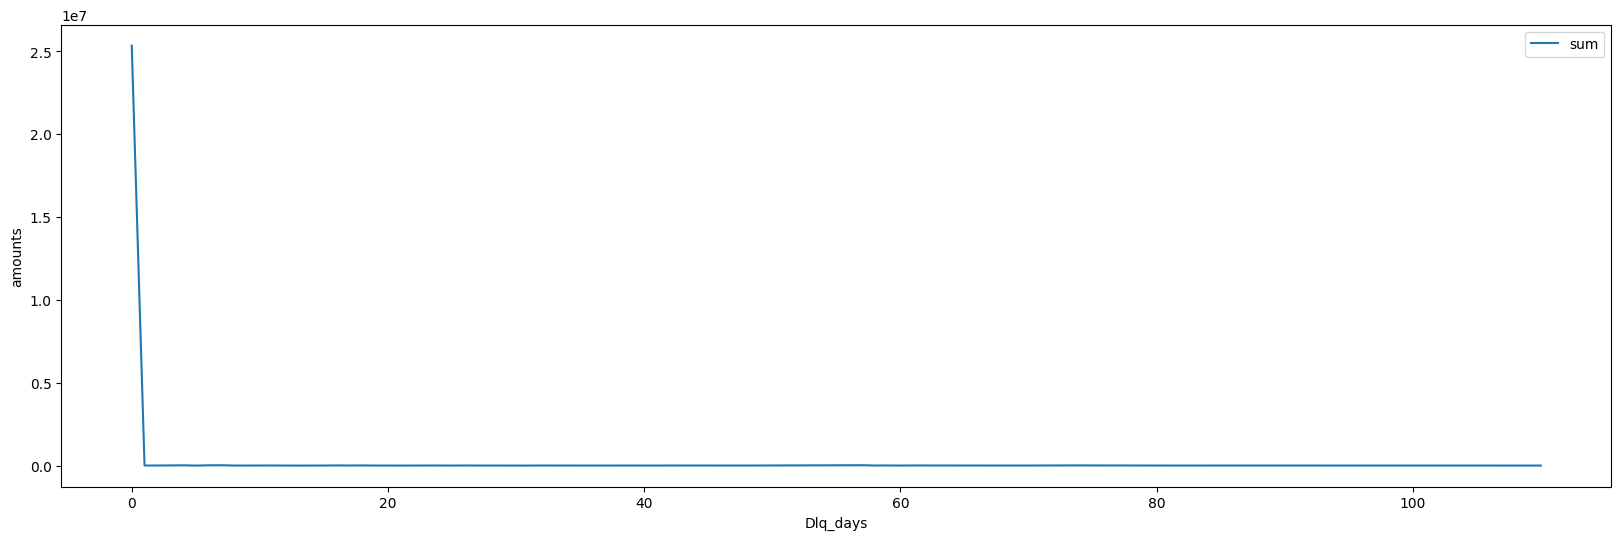

In [153]:
df2.groupby('Dlq_days')['amounts'].agg(['sum']).plot(figsize=(20,6))
plt.ylabel('amounts')
plt.xlabel('Dlq_days')

Text(0.5, 0, 'Dlq_days')

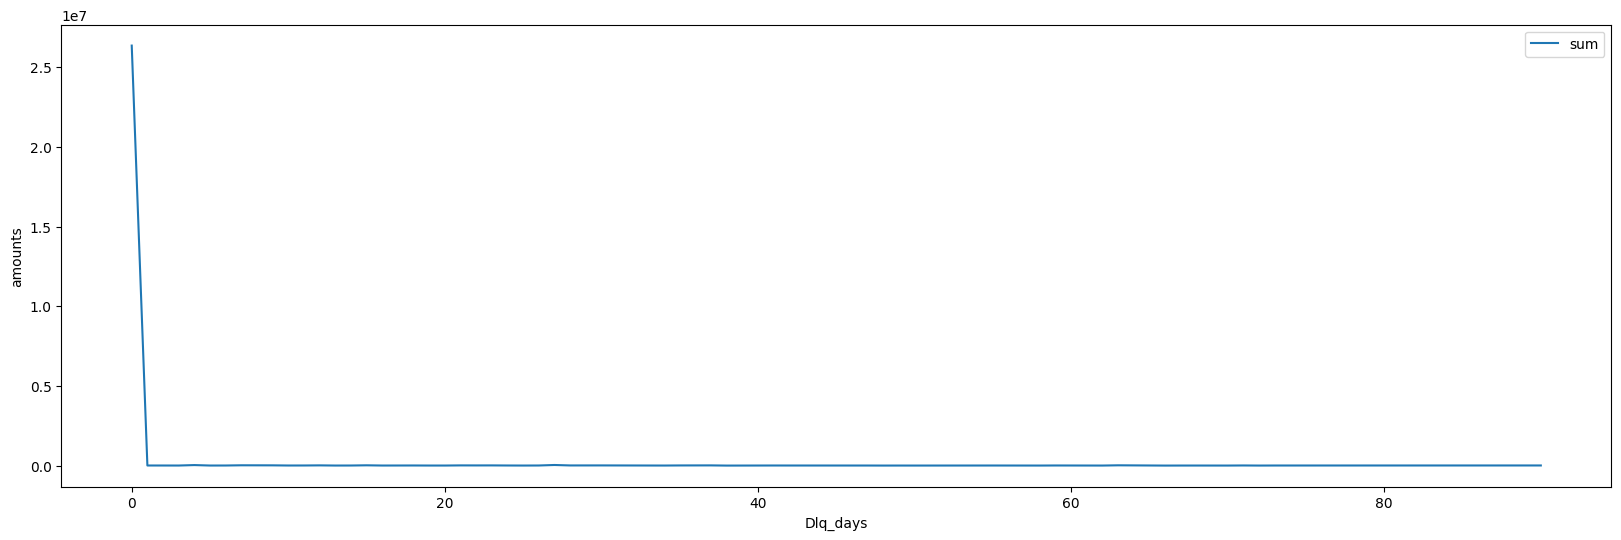

In [154]:
df3.groupby('Dlq_days')['amounts'].agg(['sum']).plot(figsize=(20,6))
plt.ylabel('amounts')
plt.xlabel('Dlq_days')

### Getting percentage to know the performance

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13180 entries, 0 to 13179
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  13180 non-null  int64         
 1   ID          13180 non-null  object        
 2   Dlq_stat    13180 non-null  object        
 3   amounts     13180 non-null  float64       
 4   obs_date    13180 non-null  datetime64[ns]
 5   Dlq_days    13180 non-null  float64       
 6   Vertical1   13180 non-null  object        
 7   Province1   13180 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 823.9+ KB


In [162]:
df1['Dlq_stat'].value_counts()

Dlq_stat
Current       13272
Delinquent      105
WriteOff          9
Name: count, dtype: int64

In [163]:
df2['Dlq_stat'].value_counts()

Dlq_stat
Current       13072
Delinquent       94
WriteOff         14
Name: count, dtype: int64

In [164]:
df3['Dlq_stat'].value_counts()

Dlq_stat
Current       13659
Delinquent      150
WriteOff         20
Name: count, dtype: int64

### Note:
I think the performance is increased with a time, size of amount beco0mes better in August.
Dlq_days is increased that is afictive in negative way

In [165]:
df1['Dlq_days'].sum()

2741.0

In [166]:
df2['Dlq_days'].sum()

3006.0

In [167]:
df3['Dlq_days'].sum()

3686.0